<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### First just checking the dataset 

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### TASK 2.

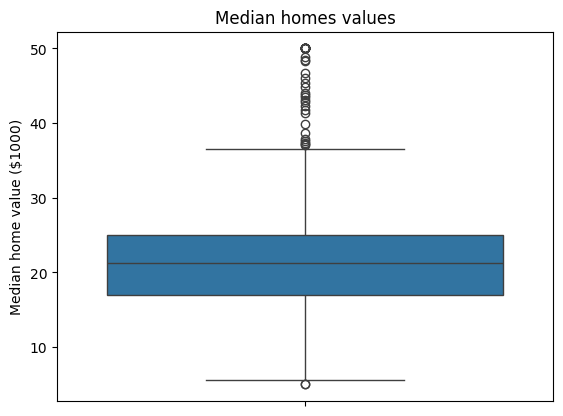

In [8]:
#Median value of owner-occupied homes Boxplot
sns.boxplot(y='MEDV',data=boston_df)
plt.ylabel("Median home value ($1000)")
plt.title('Median homes values')
plt.show()

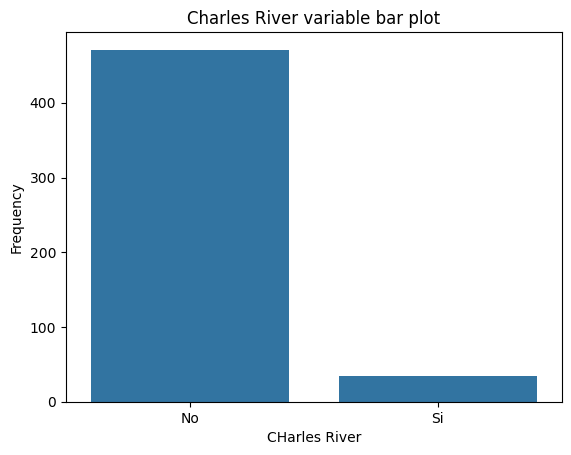

In [12]:
#Plot for the Charles river variable
chas_counts=boston_df['CHAS'].value_counts()
sns.barplot(x=chas_counts.index,y=chas_counts.values)
plt.xlabel('CHarles River')
plt.ylabel('Frequency')
plt.title('Charles River variable bar plot')
plt.xticks([0,1],['No','Si'])
plt.show()

In [14]:
#Box plot MEDV variable vs the AGE variable (By age groups))
boston_df['age_group']=''
boston_df.loc[boston_df['AGE']<=35,'age_group']='35 years old or less'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='70 years old or more'

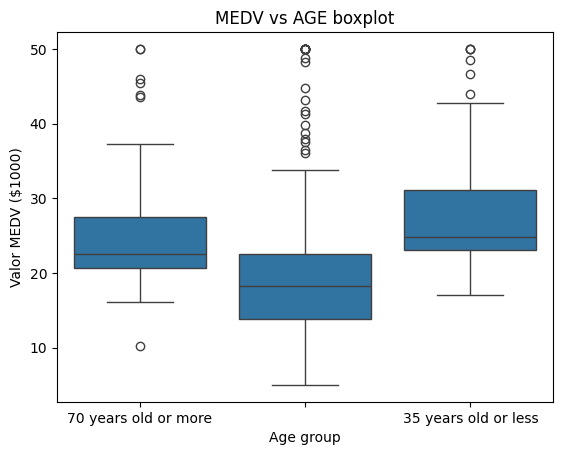

In [17]:
sns.boxplot(x='age_group',y='MEDV',data=boston_df)
plt.xlabel('Age group')
plt.ylabel('Valor MEDV ($1000)')
plt.title('MEDV vs AGE boxplot')
plt.show()

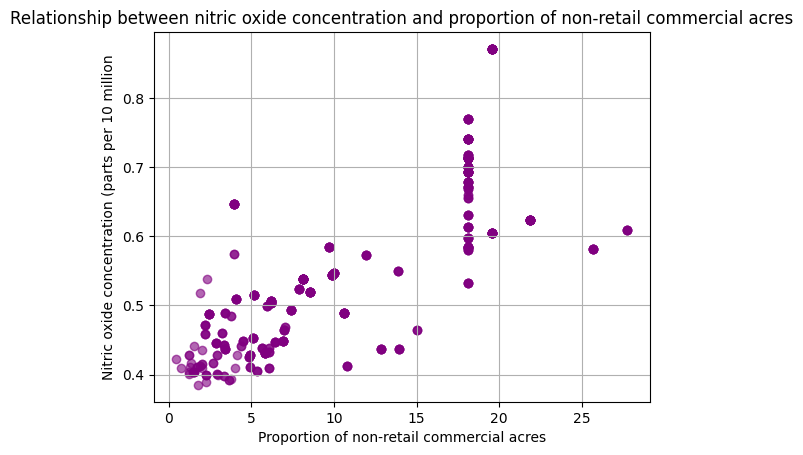

In [21]:
# Nitric oxide concentrations and the proportion of non-retail business acres per town scatter plot
plt.scatter(boston_df['INDUS'],boston_df['NOX'],color='purple',alpha=0.6)
plt.xlabel('Proportion of non-retail commercial acres')
plt.ylabel('Nitric oxide concentration (parts per 10 million')
plt.title('Relationship between nitric oxide concentration and proportion of non-retail commercial acres')
plt.grid(True)
plt.show()



We can see a small positive correlation.

### TASK 3.

In [24]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#h0= There is not any diference between the median value.
#h1= There is a difference between the median values.
from scipy.stats import ttest_ind
#GROUPS
group1=boston_df[boston_df['CHAS']==1]['MEDV']
group2=boston_df[boston_df['CHAS']==0]['MEDV']

#t-test
t_statistic,p_value=ttest_ind(group1,group2)

print('t-statistics: ',t_statistic)
print('p-value: ',p_value)





t-statistics:  3.996437466090509
p-value:  7.390623170519905e-05


Since p-value is less than 0.05 we reject the h0 and we can conclude that there is a difference between the median values.

In [27]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
boston_df['AGE_group']=pd.cut(boston_df['AGE'],bins=[0,30,70,100],labels=['New', 'Medium old', 'Old'])

In [28]:
from scipy.stats import f_oneway
group_old=boston_df['MEDV'][boston_df['AGE_group']=='Old']
group_Medium_old=boston_df['MEDV'][boston_df['AGE_group']=='Medium old']
group_new=boston_df['MEDV'][boston_df['AGE_group']=='New']

In [32]:
f_statistics,p_value=f_oneway(group_old,group_Medium_old,group_new)
print(f'F statistics: {f_statistics}')
print(f'p-value: {p_value}')


F statistics: 34.24917927263539
p-value: 1.135217093487225e-14


Since p-value is less than 0.05 we reject the h0 and we can conclude that there is a difference between the median values.

In [33]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

from scipy.stats import pearsonr

correlation_coef,p_value= pearsonr(boston_df['NOX'],boston_df['INDUS'])
print('pearson coef correlation:', correlation_coef)
print('p-value: ', p_value)


pearson coef correlation: 0.7636514469209192
p-value:  7.913361061210442e-98


We can see a strong positive correlation between NOX and INDUS. 

Since p-value is less than 0.05 we reject the h0 and we can conclude that there is statistically significant evidence to affirm that there is a strong positive variation between these two variables.

In [35]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
import pandas as pd
import statsmodels.formula.api as sm
model=sm.ols('MEDV ~ DIS',data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        19:30:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

DIS coefficient (1.0916): This value indicates that, for each additional unit in the weighted distance to employment centers (DIS), the median home value (MEDV) increases by approximately $1,091.6.  This seems contradictory to our initial intuition, since we might expect homes further away from employment centers to have a lower value.

p value of DIS coefficient (0.000): This value is much smaller than 0.05, indicating that the effect of DIS on MEDV is statistically significant.  In other words, we can be confident that the observed relationship between distance and home values ​​is not due to chance.

R-squared (0.062): This value indicates that the model with only DIS as an independent variable explains approximately 6.2% of the variation in MEDV. This is a low value, suggesting that there are other important factors influencing home values ​​besides distance to employment centers.